In [1]:
import matplotlib.pyplot as plt
import alien
import textwrap

a = alien.Alien()
a.generate_art()

In [2]:
print(a)

{
    "let_in": true,
    "art": "np.ndarray with shape (1024, 1024, 3)",
    "description": "A tall, slender alien with iridescent green skin, three luminous eyes, and long flowing tendrils instead of hair. Dressed in a futuristic black outfit adorned with glowing patterns.",
    "name": "Zylox",
    "species": "Zyloxian",
    "items": [
        "glowstick",
        "kinetic energy bracelet",
        "holographic identification"
    ],
    "demeanor": "Calm and confident, Zylox respects the bouncer's authority while engaging in polite conversation."
}


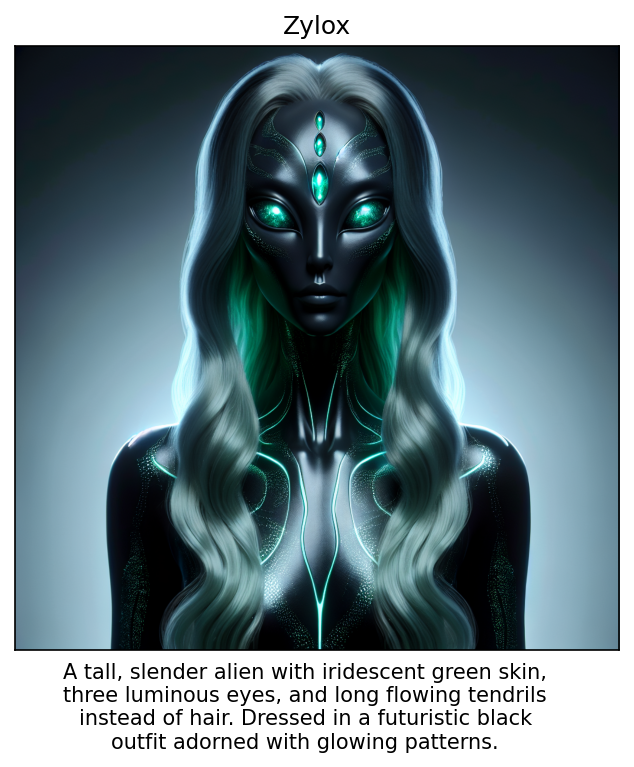

In [5]:
wrap_width = 50
wrapped_description = textwrap.fill(a.description, wrap_width)

font_size = 10
line_height = font_size / 72
num_lines = wrapped_description.count("\n") + 1
text_height_in_inches = num_lines * line_height

fig = plt.figure(dpi=150)

original_fig_height = fig.get_figheight()
fig.set_figheight(original_fig_height + text_height_in_inches)

plt.imshow(a.art)
plt.title(a.name)

plt.subplots_adjust(
    bottom=text_height_in_inches / (original_fig_height + text_height_in_inches - 1)
)

fig.text(
    0.5,
    0.001,
    wrapped_description,
    fontsize=font_size,
    ha="center",
    va="bottom",
)

plt.xticks([])
plt.yticks([])
plt.show()
